The MIT License (MIT)<br>
Copyright (c) 2016,2017 Massachusetts Institute of Technology<br>

Authors: Justin Li, Cody Rude<br>
This software has been created in projects supported by the US National<br>
Science Foundation and NASA (PI: Pankratius)<br>

Permission is hereby granted, free of charge, to any person obtaining a copy<br>
of this software and associated documentation files (the "Software"), to deal<br>
in the Software without restriction, including without limitation the rights<br>
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell<br>
copies of the Software, and to permit persons to whom the Software is<br>
furnished to do so, subject to the following conditions:<br>

The above copyright notice and this permission notice shall be included in<br>
all copies or substantial portions of the Software.<br>
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR<br>
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,<br>
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE<br>
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER<br>
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,<br>
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN<br>
THE SOFTWARE.<br>

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
# Kepler Exoplanet Light Curves Time Series
# Source: http://keplerscience.arc.nasa.gov
# Light curve in relative flux versus phase

In [3]:
from skdaccess.astro.kepler import DataFetcher as Kepler_DF
from skdaccess.utilities.kepler_util import normalize
from skdaccess.framework.param_class import *
import numpy as np

In [4]:
kepler_fetcher = Kepler_DF([AutoList(['009941662'])])

In [5]:
kepler_data = kepler_fetcher.output().get()

In [6]:
normalize(kepler_data['009941662'])

In [7]:
kepler_data['009941662'].head()

,TIMECORR,CADENCENO,SAP_FLUX,SAP_FLUX_ERR,SAP_BKG,SAP_BKG_ERR,PDCSAP_FLUX,PDCSAP_FLUX_ERR,SAP_QUALITY,PSF_CENTR1,PSF_CENTR1_ERR,PSF_CENTR2,PSF_CENTR2_ERR,MOM_CENTR1,MOM_CENTR1_ERR,MOM_CENTR2,MOM_CENTR2_ERR,POS_CORR1,POS_CORR2,QUARTER
TIME,,,,,,,,,,,,,,,,,,,,
120.539195,0.001042,568,1778533.750,33.049557,4841.642090,1.547178,0.995571,32.609024,0,NaN,NaN,NaN,NaN,388.145900,0.000016,584.520993,0.000033,0.001739,0.004915,0
120.559629,0.001043,569,1778263.875,33.047188,4846.805664,1.546246,0.995457,32.732418,0,NaN,NaN,NaN,NaN,388.145706,0.000016,584.521052,0.000033,0.001479,0.005044,0
120.580063,0.001044,570,1778347.750,33.048054,4848.539062,1.549641,0.995509,32.837833,0,NaN,NaN,NaN,NaN,388.145651,0.000016,584.520732,0.000033,0.001246,0.004843,0
120.600498,0.001044,571,1778901.000,33.052914,4847.870117,1.543734,0.995785,32.684124,0,NaN,NaN,NaN,NaN,388.145187,0.000016,584.520714,0.000033,0.000877,0.004590,0
120.620932,0.001045,572,1781658.250,33.081059,4852.192871,1.546612,0.997348,32.769455,0,NaN,NaN,NaN,NaN,388.145210,0.000016,584.520569,0.000033,0.000517,0.004524,0


<IPython.core.display.Javascript object>


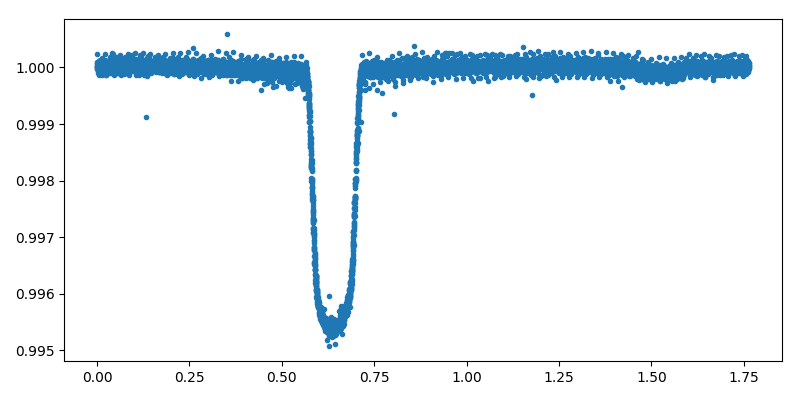

In [8]:
plt.figure(figsize=(8,4));
data = kepler_data['009941662'].iloc[0:15000]
plt.plot(np.array(data.index) % 1.7636, data['PDCSAP_FLUX'],'.');
plt.tight_layout();